# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Naiema Elsaadi

<b>My GitHub Repository is at :[GitHub Repository](https://github.com/NaiemaElsaadi/web-sraping)

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

### Requirements

In [1]:
# Create and activate a Python virtual environment. 
# Before starting the project, try all these imports FIRST
# Address any errors you get running this code cell 
# by installing the necessary packages into your active Python environment.
# Try to resolve issues using your materials and the web.
# If that doesn't work, ask for help in the discussion forums.
# You can't complete the exercises until you import these - start early! 
# We also import pickle and Counter (included in the Python Standard Library).

from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed.')

Package                       Version
----------------------------- -----------
annotated-types               0.6.0
anyio                         3.6.1
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
astroid                       2.11.7
asttokens                     2.0.8
attrs                         22.1.0
Babel                         2.10.3
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
beautifulsoup4                4.11.1
bleach                        5.0.1
blis                          0.7.11
brotlipy                      0.7.0
catalogue                     2.0.10
certifi                       2023.7.22
cffi                          1.15.1
charset-normalizer            2.0.4
click                         8.1.3
cloudpathlib                  0.16.0
colorama                      0.4.6
conda                         4.14.0
conda-package-handling        1.8.1
confection                    0.1.4
cryptography                  37.0.1
cycl

### Question 1

<b>Q1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [2]:
import requests

response = requests.get('https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/')

print(response.status_code)
print(response.headers['content-type'])

200
text/html; charset=UTF-8


In [3]:
import requests
from bs4 import BeautifulSoup
import pickle

# parser = 'html5lib'
parser = 'html.parser'

soup = BeautifulSoup(response.text, parser)

article_page = requests.get('https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/')
article_html = article_page.text



with open('python-match.pkl', 'wb') as f:
    pickle.dump(article_page.text, f)

# Load the pickled data
with open('python-match.pkl', 'rb') as f:
    article_html = pickle.load(f)

    soup = BeautifulSoup(article_html, parser)
article_element = soup.find('article')

# Print the pickled data
print(article_element)
    



<article class="post-466450 post type-post status-publish format-standard has-post-thumbnail hentry category-car-hacks category-engineering category-featured category-laser-hacks category-slider tag-laser tag-laser-headlight tag-laser-headlights tag-light" id="post-466450" itemscope="" itemtype="http://schema.org/Article">
<header class="entry-header">
<h1 class="entry-title" itemprop="name">How Laser Headlights Work</h1>
<div class="entry-meta">
<a class="comments-counts" href="https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/#comments"><span class="icon-hackaday icon-hackaday-comment"></span>
                130 Comments            </a>
<ul class="meta-authors vcard author">
<li>by:</li>
<span class="fn"><a class="author url fn" href="https://web.archive.org/web/20210327165005/https://hackaday.com/author/lewinday/" rel="author" title="Posts by Lewin Day">Lewin Day</a></span>
</ul>
</div><!-- .entry-meta -->
<div class="entry-meta en

### Question 2

<b>Q2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [4]:
from bs4 import BeautifulSoup
import pickle

# Read the HTML content from the file
with open("python-match.pkl", "rb") as f:
    html_content = pickle.load(f)

# Parse the HTML content
soup = BeautifulSoup(html_content, "html.parser")

# Find the article element
article_element = soup.find("article")

# Get the text from the article element
article_text = article_element.get_text()

# Print the text
print(article_text)





How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside o

In [5]:
# Define the text data
text_data = """
How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021


When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!
Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside of a very specific spot quite some distance away. Thankfully for our eyes, laser headlights don’t work in this way at all.
Instead, laser headlights consist of one or more solid state laser diodes mounted inside the headlight. These blue lasers are fired at a yellow phosphor, similar to that used in white LEDs. This produces a powerful, vibrant white light that can then be bounced off reflectors and out of the headlights towards the road. Laser headlights built in this way have several benefits. They’re more energy efficient than LEDs that put out the same amount of light, while also being more space efficient, too.
BWM’s futuristic i8 was one of the first vehicles to ship with laser headlight technology.
Laser headlights are still a nascent technology, thus far only appearing in a few BMW, Audi, and other select vehicles. BMW’s technology was developed in partnership with lighting experts OSRAM. In practice, a regular LED low-beam lamp is used, with the laser used to create an incredibly bright and focused spot, used for high-beams. This can provide illumination out to 600 meters ahead of the vehicle, double that of conventional LED high beams. The lights use indium gallium nitride diode lasers that were originally used in projectors, with power levels above 1 watt. One of the challenges in implementing such technology in an automotive environment is the need for it to operate at temperature extremes. While research lasers and laser pointers may primarily be used at typical room temperatures, automotive headlights must be able to withstand everything from 40 degrees below zero up to 50 degrees C. Thankfully, the laser’s high efficiency means it doesn’t have huge heat output of its own to further complicate things. Other engineering challenges involve tailoring the optics package for the rough-and-tumble, high vibration environment found in the automotive application. It’s also important to ensure, as with any such device, that the end user can’t be exposed to harmful laser radiation in the event of accident or malfunction.
Tearing Down the Laser Headlight
A marketing image showing the construction of an aftermarket LED/laser headlight. We’d take the laser power with a grain of salt — it’s difficult to imagine a 10 W laser shining directly on some small LEDs without melting a hole through the board in short order.
An aftermarket has sprung up too, with delightfully innovative designs. Combined laser/LED headlights are readily available on Alibaba, designed as a drop in replacement for projector lamps on existing vehicles. These often use an LED low-beam, and a combined LED/laser high beam, where the laser diode shoots directly at the LED phosphor to excite it further, rather than using its own. These units often also come with fan cooling to keep the laser and LEDs below their maximum operational temperature. Such developments are exciting, though it’s important to be wary of the performance of unknown aftermarket headlights. Many aftermarket LED headlight “upgrades” fail to pass muster when it comes to real-world performance, and there’s no reason to believe hybrid LED/laser designs will be any different. We’d love to pass a selection of these parts through a full IIHS test protocol, but that’s sadly beyond the scope (and budget!) of this article.
However, [mikeselectricstuff] has happened to lay his hands on both the BMW and aftermarket parts, tearing them all down in his workshop to see what makes them tick. The differences are multitude when laid bare on the bench. The AliExpress part is relatively simple, wired up no differently from a regular headlight. Interestingly, however, the laser high-beam circuit runs all the time in these parts. To prevent blinding other road users, a shutter is kept in place to block the light, which is moved out of the way with a solenoid when the driver turns on the high beam switch.
Where the aftermarket part is a little out of left field, the BMW design is another thing entirely. The cutting-edge headlights are hooked up with multiple connectors and over 30 conductors, with much of the driver electronics living in an external controller. Much of this is to drive the various LEDs and stepper motors for slewing the headlights when steering. However, the laser assembly brings its own complexities. Twin light sensors are built inside to monitor the laser beam, and a special metal blocking arm sits directly in front of the diode, presumably to stop the laser light leaving the headlight in the event the phosphor coating burns through. It’s truly wild to get a look inside a modern luxury car’s headlight and see just how far we’ve come from the old days of simple sealed beams.
Cost Versus Performance
Despite the efficiency gains available, the technology remains expensive. Powerful laser diodes don’t come cheap, after all. However, as the technology trickles down to lower-end models, it’s likely that we could see economies of scale change that for the better. Indeed, if national authorities begin to demand higher performance headlights as standard, we could see laser headlights become the norm, rather than an expensive luxury. The technology could naturally be applied to home and commercial lighting, too — though we suspect the potential gains are limited enough that LED lighting will remain the norm for some time to come.
The high light output of laser headlights in a compact package allows engineers greater freedom when designing the front-end of a car.
As it currently stands, much of the appeal of the new technology is about the packaging benefits, which allow automotive designers greater freedom around the headlight area. Such concerns are less of a factor when it comes to light fittings in the home or office, or indeed, on lower-end automobiles. Regardless, it’s an exciting new application for lasers and one we’ll be sure to see more of in the future.
Posted in car hacks, Engineering, Featured, Laser Hacks, SliderTagged laser, laser headlight, laser headlights, light 

"""

# Write the text data to a file
with open('article.txt', 'w', encoding='utf-8') as file:
    file.write(text_data)

print("File 'article.txt' has been created successfully.")


File 'article.txt' has been created successfully.


### Question 3

<b>Q3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [6]:

import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp(article_element.get_text())
t = [token.text.lower() for token in doc if token.is_stop != True and token.is_punct != True and token.is_space != True]   
print(t)

['laser', 'headlights', 'work', '130', 'comments', 'lewin', 'day', 'march', '22', '2021', 'think', 'onward', 'march', 'automotive', 'technology', 'headlights', 'usually', 'thing', 'come', 'mind', 'engines', 'fuel', 'efficiency', 'switch', 'electric', 'power', 'mind', 'mean', 'thousands', 'engineers', 'world', 'working', 'improve', 'state', 'art', 'automotive', 'lighting', 'day', 'day', 'sealed', 'beam', 'headlights', 'gave', 'way', 'modern', 'designs', 'regulations', 'loosened', 'bulbs', 'moved', 'simple', 'halogens', 'xenon', 'hids', 'recently', 'leds', 'new', 'technology', 'scene', 'lasers', 'laser', 'headlights', 'bwm', 'prototype', 'laser', 'headlight', 'assemblies', 'undergoing', 'testing', 'image', 'brought', 'mind', 'phrase', 'laser', 'headlights', 'laser', 'beams', 'firing', 'automobile', 'obviously', 'coherent', 'beams', 'monochromatic', 'light', 'poor', 'illumination', 'outside', 'specific', 'spot', 'distance', 'away', 'thankfully', 'eyes', 'laser', 'headlights', 'work', 'way

In [7]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

nlp = spacy.load('en_core_web_sm')
doc = nlp(article_element.get_text())
from collections import Counter

def important_token(token):
    return not (token.is_space or token.is_punct or token.is_stop)

interesting_tokens = [token.text.lower() for token in doc if important_token(token)]
word_freq = Counter(map(str,interesting_tokens))
best_token = (word_freq.most_common(5))
print(best_token)
best_tokens = set()
for token, freq in word_freq.most_common(5):
    best_tokens.add(token)
print(best_tokens)



[('laser', 35), ('headlights', 19), ('headlight', 11), ('technology', 10), ('led', 10)]
{'headlights', 'technology', 'laser', 'headlight', 'led'}


In [8]:
### using text file:

# Read the contents of the article text file
with open('article.txt', 'r', encoding='utf-8') as file:
    article_text = file.read()
   # Process the text using spaCy
doc = nlp(article_text)
from collections import Counter

def important_token(token):
    return not (token.is_space or token.is_punct or token.is_stop)

interesting_tokens = [token.text.lower() for token in doc if important_token(token)]
word_freq = Counter(map(str,interesting_tokens))
best_token = (word_freq.most_common(5))
print(best_token)
best_tokens = set()
for token, freq in word_freq.most_common(5):
    best_tokens.add(token)
print(best_tokens)


[('laser', 35), ('headlights', 19), ('headlight', 11), ('technology', 10), ('led', 10)]
{'headlights', 'technology', 'laser', 'headlight', 'led'}


### Question 4

<b>Q4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [9]:
interesting_lemmas = [token.lemma_.lower() for token in doc if important_token(token)]
lemma_freq = Counter(interesting_lemmas)
best_lemmas= lemma_freq.most_common(5)
print(best_lemmas)
best_lemmas = set()
for lemma, freq in lemma_freq.most_common(5):
    best_lemmas.add(lemma)
print(best_lemmas)



[('laser', 40), ('headlight', 28), ('beam', 12), ('technology', 10), ('light', 10)]
{'technology', 'laser', 'light', 'headlight', 'beam'}


In [10]:
### using text file:

# Read the contents of the article text file
with open('article.txt', 'r', encoding='utf-8') as file:
    article_text = file.read()

# Process the text using spaCy
doc = nlp(article_text)
interesting_lemmas = [token.lemma_.lower() for token in doc if important_token(token)]
lemma_freq = Counter(interesting_lemmas)
best_lemmas= lemma_freq.most_common(5)
# Get the 5 most common lemmas
best_lemmas = lemma_freq.most_common(5)
print("5 Most Frequent Lemmas ", best_lemmas)

best_lemmas = set()
for lemma, freq in lemma_freq.most_common(5):
    best_lemmas.add(lemma)
print(best_lemmas)


5 Most Frequent Lemmas  [('laser', 40), ('headlight', 28), ('beam', 12), ('technology', 10), ('light', 10)]
{'technology', 'laser', 'light', 'headlight', 'beam'}


### Question 5

<B>Q5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
<b>You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [11]:
most_tokens = ['laser', 'headlights', 'technology', 'headlight', 'led']  # The words we are testing
sentences = list(doc.sents)

# Finding the word count of a sentence.
def wordCount(sentence):
    count = 0
    for token in sentence:
        if not (token.is_space or token.is_punct):
            count += 1
    return count
print('sentence:')
print(sentences[1])  # Printing the sentence we are testing

# Here is our function that gives the score.
def score_sentence_by_tokens(sentence, interesting_token):
    count = 0
    for token in sentence:
        if token.text.lower() in interesting_token:
            count += 1
    score = count / wordCount(sentence)
    print("Score:", score)
    # Add a comment indicating the interpretation of the score
    print("The score is {} tokens in the list divided by the {} words in the sentence.".format(count, wordCount(sentence)))

tscore1 = score_sentence_by_tokens(sentences[1], most_tokens)  # Here is the test of the function


sentence:
When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.
Score: 0.09523809523809523
The score is 2 tokens in the list divided by the 21 words in the sentence.


In [12]:
best_lemmas = {'laser', 'headlight', 'beam', 'technology', 'light'}  # The lemmas we are testing

# Function to calculate the word count of a sentence
def wordCount(sentence):
    count = sum(1 for token in sentence if not (token.is_space or token.is_punct))
    return count

# Printing the sentence we are testing
print('sentence:')
print(sentences[1])

# Function to calculate the score based on lemmas
def score_sentence_by_lemma(sentence, interesting_lemmas):
    count = sum(1 for token in sentence if token.lemma_.lower() in interesting_lemmas)
    score = count / wordCount(sentence) if wordCount(sentence) != 0 else 0
    print("Score:", score)
    # Add a comment indicating the interpretation of the score
    print("The score is {} lemmas in the list divided by the {} words in the sentence.".format(count, wordCount(sentence)))
    return score

# Here is the test of the function
score_lemma = score_sentence_by_lemma(sentences[1], best_lemmas)


sentence:
When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.
Score: 0.09523809523809523
The score is 2 lemmas in the list divided by the 21 words in the sentence.


### Question 6

<B>Q6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

In [13]:


sentences = list(doc.sents) # Finds score for each sentence
for sentence in sentences:
    count1= 0
    for token in sentence:
        if token.text.lower() in best_tokens:
            count1+= 1
    count2 = 0
    for token in sentence:
        if not(token.is_space or token.is_punct):
            count2 += 1
    sent_str = str(sentence).replace('\n','').replace('  ',' ')
    print(count1/count2,':',sent_str)


0.16666666666666666 : How Laser Headlights Work        130 Comments      by:Lewin DayMarch 22, 2021
0.09523809523809523 : When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.
0.0 : Engines, fuel efficiency, and the switch to electric power are all more front of mind.
0.0 : However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
0.038461538461538464 : Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs.
0.1 : Now, a new technology is on the scene, with lasers!
1.0 : Laser Headlights?!
0.25 : BWM’s prototype laser headlight assemblies undergoing testing.
0.13043478260869565 : The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile.
0.0 : 

In [14]:
tscores = []
for sentence in sentences:
    count1= 0
    for token in sentence:
        if token.text.lower() in best_tokens:
            count1 += 1
    count2 = 0
    for token in sentence:
        if not(token.is_space or token.is_punct):
            count2 += 1
    score = count1 / count2 if count2 > 0 else 0
    tscores.append(score)

print("TokensLIST =", tscores)




TokensLIST = [0.16666666666666666, 0.09523809523809523, 0.0, 0.0, 0.038461538461538464, 0.1, 1.0, 0.25, 0.13043478260869565, 0.0, 0.14285714285714285, 0.25, 0.0, 0.045454545454545456, 0.2222222222222222, 0.0, 0.1875, 0.15, 0.09090909090909091, 0.07692307692307693, 0.05263157894736842, 0.0, 0.045454545454545456, 0.05660377358490566, 0.0, 0.03333333333333333, 0.29411764705882354, 0.05555555555555555, 0.0, 0.14285714285714285, 0.15151515151515152, 0.05263157894736842, 0.05555555555555555, 0.12903225806451613, 0.0, 0.0, 0.0, 0.0, 0.07142857142857142, 0.07142857142857142, 0.0, 0.0, 0.04, 0.05555555555555555, 0.125, 0.07317073170731707, 0.03225806451612903, 0.08333333333333333, 0.1111111111111111, 0.04, 0.12, 0.06060606060606061, 0.08695652173913043, 0.07407407407407407, 0.0, 0.0, 0.4]


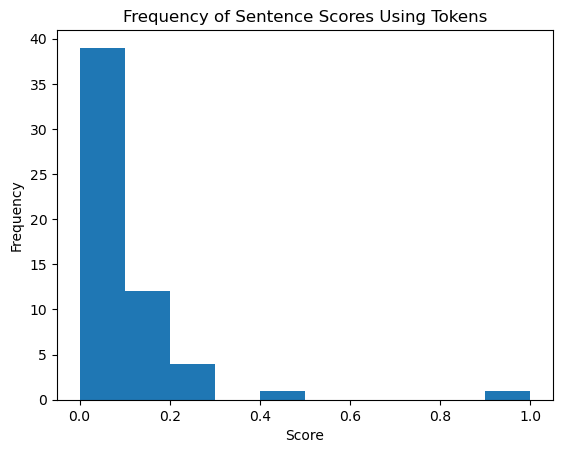

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Plot histogram
plt.hist(tscores)
plt.title('Frequency of Sentence Scores Using Tokens')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()



### Question 7

<b> Q7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

In [16]:
sentences = list(doc.sents) # Find Score Each Sentence
for sentence in sentences:
    count1= 0
    for lemma in sentence:
        if lemma.lemma_.lower() in best_lemmas:
            count1+= 1
    count2 = 0
    for lemma in sentence:
        if not(lemma.is_space or lemma.is_punct):
            count2 += 1
    sent_str = str(sentence).replace('\n','').replace('  ',' ')
    print(count1/count2,':',sent_str)


0.08333333333333333 : How Laser Headlights Work        130 Comments      by:Lewin DayMarch 22, 2021
0.09523809523809523 : When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.
0.0 : Engines, fuel efficiency, and the switch to electric power are all more front of mind.
0.0 : However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
0.07692307692307693 : Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs.
0.2 : Now, a new technology is on the scene, with lasers!
0.5 : Laser Headlights?!
0.25 : BWM’s prototype laser headlight assemblies undergoing testing.
0.17391304347826086 : The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile.
0.09523

In [17]:
# Initialize list to store lemma scores
lscores1 = []

# Loop through each sentence to calculate lemma scores
for sentence in sentences:
    count1 = 0
    for token in sentence:
        if token.lemma_.lower() in best_lemmas:
            count1 += 1
    
    count2 = 0
    for token in sentence:
        if not (token.is_space or token.is_punct):
            count2 += 1
    
    # Calculate lemma score for the sentence
    score = count1 / count2 if count2 > 0 else 0
    lscores1.append(score)

# Print the list of lemma scores
print("LemmasLIST =", lscores1)


LemmasLIST = [0.08333333333333333, 0.09523809523809523, 0.0, 0.0, 0.07692307692307693, 0.2, 0.5, 0.25, 0.17391304347826086, 0.09523809523809523, 0.14285714285714285, 0.25, 0.0625, 0.09090909090909091, 0.2222222222222222, 0.045454545454545456, 0.1875, 0.15, 0.09090909090909091, 0.11538461538461539, 0.05263157894736842, 0.1, 0.045454545454545456, 0.07547169811320754, 0.0, 0.03333333333333333, 0.23529411764705882, 0.05555555555555555, 0.0, 0.09523809523809523, 0.12121212121212122, 0.05263157894736842, 0.05555555555555555, 0.06451612903225806, 0.0, 0.0, 0.0, 0.0, 0.07142857142857142, 0.14285714285714285, 0.05714285714285714, 0.0, 0.04, 0.05555555555555555, 0.125, 0.14634146341463414, 0.06451612903225806, 0.08333333333333333, 0.1111111111111111, 0.04, 0.12, 0.030303030303030304, 0.13043478260869565, 0.07407407407407407, 0.041666666666666664, 0.045454545454545456, 0.4666666666666667]


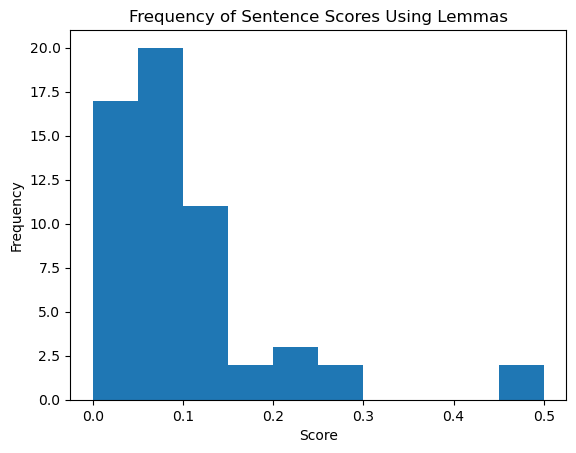

In [18]:
# Plot histogram
plt.hist(lscores1)
plt.title('Frequency of Sentence Scores Using Lemmas')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

### Question 8

<b>Q8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).<br></b>

 The Token "led" would be removed as it is a verb, not a noun. All of the other Tokens and Lexems would not be ommitted, because they are all nouns. To change the code to only consider nouns, we could use part of speech tagging to ensure that the analysis only includes tokens and lexems that are nouns. This would be done by checking if the 'token.pos_' attribute (for tokens) and the 'token.pos' attribute (for lexems) are equal to the 'NOUN' attribute.

<b>For tokens (in question 3)<br>
`interesting_tokens = [token.text.lower() for token in doc if important_token(token) and token.pos_ == 'NOUN']`

<b> For lemmas (in question 4)<br>
`interesting_lemmas = [token.lemma_.lower() for token in doc if important_token(token) and token.pos_ == 'NOUN']`
